<h5>Calculate the RMSD</h5>

<Universe with 23296 atoms>


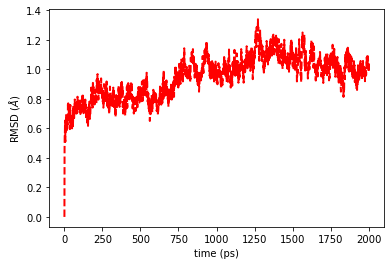

In [3]:
from MDAnalysis.analysis import rms
import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt

u = mda.Universe("ionized.psf", "kras_prod.dcd")
print(u)
u.atoms.segments
CA = u.select_atoms("name CA")
ref = CA.positions.copy()

RMSD = []
for ts in u.trajectory:
   RMSD.append((u.trajectory.time, rms.rmsd(CA.positions, ref, superposition=True)))
RMSD = np.array(RMSD)
ax = plt.subplot(111)
ax.plot(RMSD[:,0], RMSD[:,1], 'r--', lw=2, label=r"RMSD")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
plt.draw()